<a href="https://colab.research.google.com/github/oktavian-ramadhani/data-analyst/blob/main/LINEAR_REGRESSION_ANALYSIS_OBESITY_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR REGRESSION ANALYSIS - OBESITY PREDICTION
  
Dataset: Obesity Levels from Kaggle

> Nama: Oktavian Ramadhani

> NIM : 19240388

> Mata Kuliah: FUNDAMENTAL DATA ANALYST (0406)



Dataset Source: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# LOAD DATASET

In [ ]:
# Load dataset
df = pd.read_csv('/content/sample_data/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
# Cek data
print(f"Jumlah data: {df.shape[0]} rows, {df.shape[1]} columns")

Jumlah data: 2111 rows, 17 columns


# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
#Informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
#Data 5 Pertama
print(df.head())

    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Norm

In [ ]:
#StatistikDeskriptif
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [ ]:
#Cek Missing Values
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "Tidak ada missing values!")

Tidak ada missing values!


In [ ]:
#Cek Duplikat
print(f"Jumlah duplikat: {df.duplicated().sum()}")

Jumlah duplikat: 24


# DATA PREPROCESSING

In [ ]:
# 4.1 Buat kolom BMI (Body Mass Index) sebagai target variable
# BMI = Weight / (Height^2)
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
print(f"BMI Range: {df['BMI'].min():.2f} - {df['BMI'].max():.2f}")

BMI Range: 13.00 - 50.81


In [ ]:
# 4.2 Encoding Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Kolom Kategorikal: {categorical_cols}")

Kolom Kategorikal: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']


In [ ]:
# Label Encoding untuk semua kolom kategorikal
le_dict = {}
df_encoded = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le
    print(f"  - {col}: {df[col].nunique()} kategori")

  - Gender: 2 kategori
  - CALC: 4 kategori
  - FAVC: 2 kategori
  - SCC: 2 kategori
  - SMOKE: 2 kategori
  - family_history_with_overweight: 2 kategori
  - CAEC: 4 kategori
  - MTRANS: 5 kategori
  - NObeyesdad: 7 kategori


In [ ]:
# 4.3 Pilih Features dan Target
# Target: BMI
# Features: semua kolom kecuali Weight, Height, NObeyesdad, dan BMI (karena BMI adalah target)
target_col = 'BMI'

# Kolom yang akan dikecualikan dari fitur
cols_to_exclude_from_features = ['Weight', 'Height', 'NObeyesdad', target_col]

X = df_encoded.drop(columns=cols_to_exclude_from_features)
y = df_encoded[target_col]

print(f"Features yang digunakan ({len(X.columns)}):")
for i, col in enumerate(X.columns, 1):
    print(f"  {i}. {col}")

print(f"Target Variable: {target_col}")

Features yang digunakan (14):
  1. Age
  2. Gender
  3. CALC
  4. FAVC
  5. FCVC
  6. NCP
  7. SCC
  8. SMOKE
  9. CH2O
  10. family_history_with_overweight
  11. FAF
  12. TUE
  13. CAEC
  14. MTRANS

🎯 Target Variable: BMI


# VISUALISASI DATA

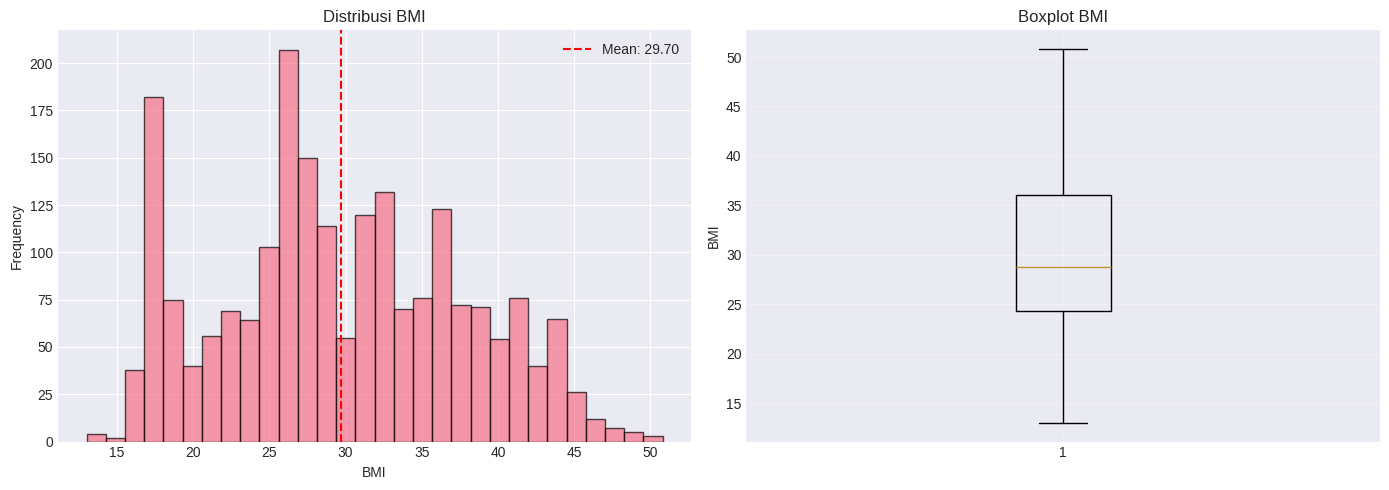

In [ ]:
# 5.1 Distribusi BMI
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(y, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribusi BMI')
axes[0].axvline(y.mean(), color='red', linestyle='--', label=f'Mean: {y.mean():.2f}')
axes[0].legend()

axes[1].boxplot(y, vert=True)
axes[1].set_ylabel('BMI')
axes[1].set_title('Boxplot BMI')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


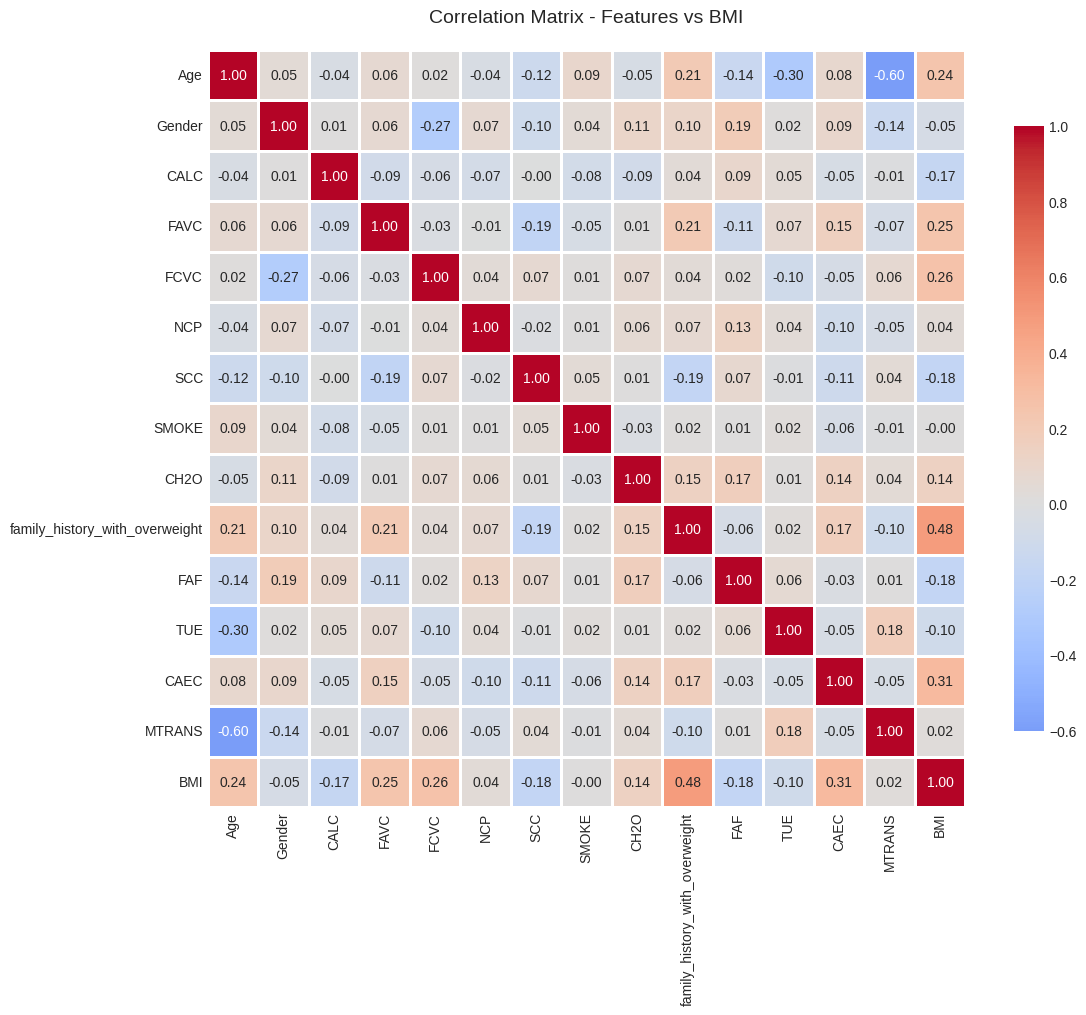

In [ ]:
# 5.2 Correlation Matrix
numeric_cols = df_encoded[feature_cols + [target_col]].select_dtypes(include=[np.number]).columns
corr_matrix = df_encoded[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Features vs BMI', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

10 Features terbesar dengan Korelasi Tertinggi terhadap BMI:
family_history_with_overweight    0.483508
CAEC                              0.313278
FCVC                              0.263651
FAVC                              0.246097
Age                               0.244163
CH2O                              0.144200
NCP                               0.039969
MTRANS                            0.022061
SMOKE                            -0.000819
Gender                           -0.053035
Name: BMI, dtype: float64


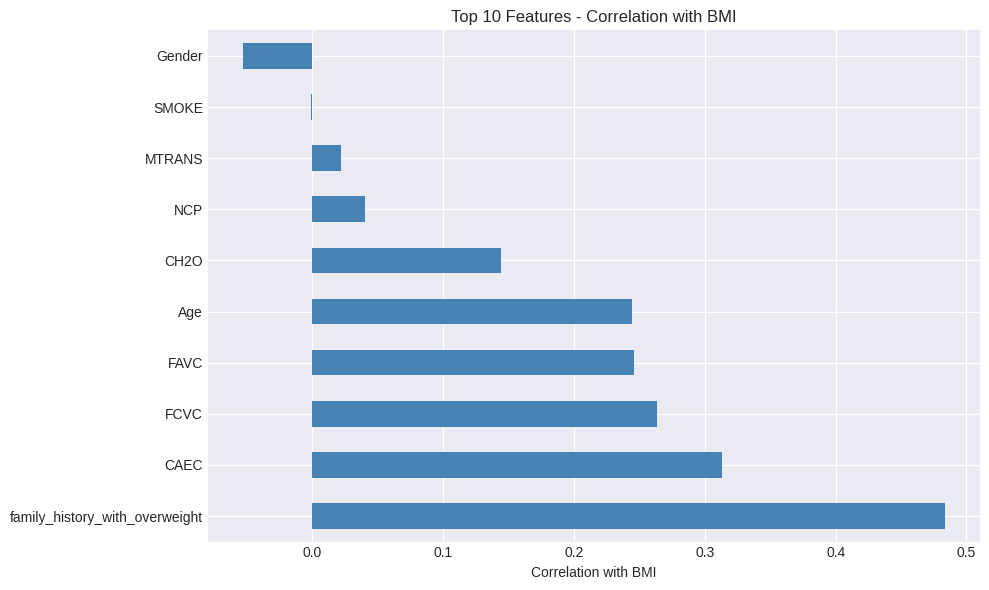

In [ ]:
# 5.3 Top 5 Features dengan Korelasi Tertinggi terhadap BMI
bmi_corr = corr_matrix['BMI'].drop('BMI').sort_values(ascending=False)
print("10 Features terbesar dengan Korelasi Tertinggi terhadap BMI:")
print(bmi_corr.head(10))

plt.figure(figsize=(10, 6))
bmi_corr.head(10).plot(kind='barh', color='steelblue')
plt.xlabel('Correlation with BMI')
plt.title('Top 10 Features - Correlation with BMI')
plt.tight_layout()
plt.show()

# SPLIT DATA - TRAIN & TEST

In [ ]:
# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Data berhasil di-split!")
print(f"  - Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  - Testing set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")


Data berhasil di-split!
  - Training set: 1688 samples (80.0%)
  - Testing set:  423 samples (20.0%)


# FEATURE SCALING (NORMALISASI)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling selesai menggunakan StandardScaler")
print("   (Mean = 0, Standard Deviation = 1)")

Feature scaling selesai menggunakan StandardScaler
   (Mean = 0, Standard Deviation = 1)



# TRAINING MODEL - LINEAR REGRESSION

In [ ]:
# Inisialisasi dan training model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("✅ Model Linear Regression berhasil di-train!")
print(f"\n📊 Intercept (β0): {model.intercept_:.4f}")
print(f"\n📊 Coefficients (β1, β2, ..., βn):")
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)
print(coef_df.to_string(index=False))

✅ Model Linear Regression berhasil di-train!

📊 Intercept (β0): 29.7082

📊 Coefficients (β1, β2, ..., βn):
                       Feature  Coefficient
family_history_with_overweight     2.919378
                          FCVC     1.887805
                           Age     1.857923
                          CAEC     1.783094
                        MTRANS     1.637727
                          FAVC     0.820186
                           NCP     0.378659
                          CH2O     0.312139
                         SMOKE    -0.150737
                           TUE    -0.216496
                        Gender    -0.248856
                           SCC    -0.501131
                           FAF    -0.799485
                          CALC    -0.999183


# PREDIKSI

In [ ]:
# Prediksi pada training dan testing set
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# EVALUASI MODEL

In [ ]:
# Hitung metrik evaluasi
def evaluate_model(y_true, y_pred, set_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n📈 {set_name} Set:")
    print(f"  - R² Score:  {r2:.4f} ({r2*100:.2f}%)")
    print(f"  - RMSE:      {rmse:.4f}")
    print(f"  - MAE:       {mae:.4f}")
    print(f"  - MAPE:      {mape:.2f}%")

    return r2, rmse, mae, mape

In [ ]:
# Evaluasi Training Set
train_r2, train_rmse, train_mae, train_mape = evaluate_model(y_train, y_train_pred, "TRAINING")


📈 TRAINING Set:
  - R² Score:  0.4559 (45.59%)
  - RMSE:      5.8858
  - MAE:       4.7198
  - MAPE:      17.66%


In [ ]:
# Evaluasi Testing Set
test_r2, test_rmse, test_mae, test_mape = evaluate_model(y_test, y_test_pred, "TESTING")


📈 TESTING Set:
  - R² Score:  0.4754 (47.54%)
  - RMSE:      5.8868
  - MAE:       4.7605
  - MAPE:      17.99%


📊 Model Performance Summary:
  
1. R² Score (Coefficient of Determination):
   - Training: {train_r2:.4f} → Model menjelaskan {train_r2*100:.2f}% variasi BMI
   - Testing:  {test_r2:.4f} → Model menjelaskan {test_r2*100:.2f}% variasi BMI
   
2. RMSE (Root Mean Squared Error):
   - Training: {train_rmse:.4f} → Rata-rata error prediksi BMI
   - Testing:  {test_rmse:.4f} → Rata-rata error prediksi BMI
   
3. MAE (Mean Absolute Error):
   - Training: {train_mae:.4f} → Rata-rata absolut error
   - Testing:  {test_mae:.4f} → Rata-rata absolut error

4. MAPE (Mean Absolute Percentage Error):
   - Training: {train_mape:.2f}% → Persentase error rata-rata
   - Testing:  {test_mape:.2f}% → Persentase error rata-rata

✅ Overfitting Check:
   {"⚠️ Model cenderung overfit (train R² >> test R²)" if (train_r2 - test_r2) > 0.1 else "✅ Model generalisasi dengan baik"}
""")


# VISUALISASI HASIL


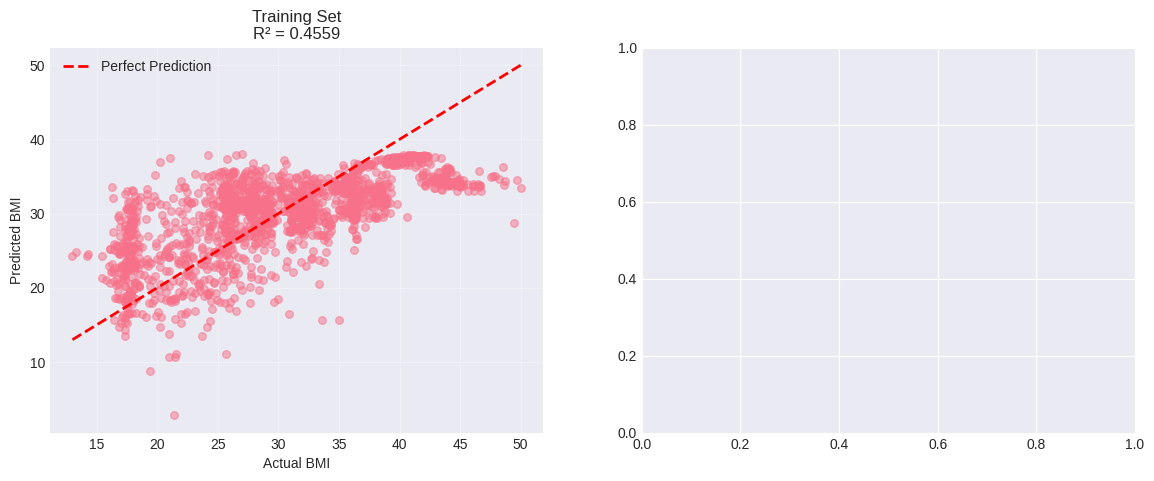

In [ ]:
# 11.1 Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training Set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=30)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual BMI')
axes[0].set_ylabel('Predicted BMI')
axes[0].set_title(f'Training Set\nR² = {train_r2:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

In [ ]:
# Testing Set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=30, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual BMI')
axes[1].set_ylabel('Predicted BMI')
axes[1].set_title(f'Testing Set\nR² = {test_r2:.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('04_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
print("✅ Actual vs Predicted plot disimpan: 04_actual_vs_predicted.png")
plt.show()

✅ Actual vs Predicted plot disimpan: 04_actual_vs_predicted.png


<Figure size 640x480 with 0 Axes>

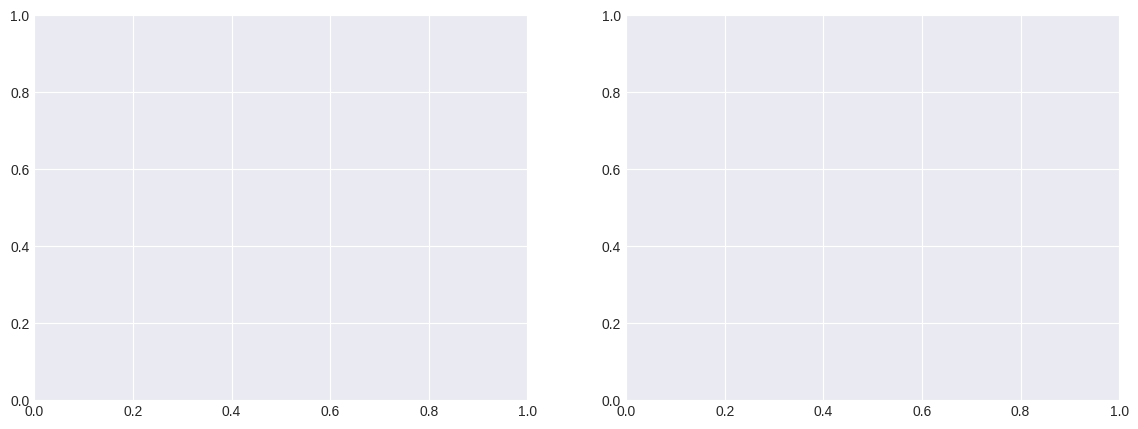

In [ ]:
# 11.2 Residual Plot
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

In [ ]:
# Training Residuals
axes[0].scatter(y_train_pred, residuals_train, alpha=0.5, s=30)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted BMI')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot - Training Set')
axes[0].grid(True, alpha=0.3)

In [ ]:
# Testing Residuals
axes[1].scatter(y_test_pred, residuals_test, alpha=0.5, s=30, color='orange')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted BMI')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot - Testing Set')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('05_residual_plot.png', dpi=300, bbox_inches='tight')
print("✅ Residual plot disimpan: 05_residual_plot.png")
plt.show()

✅ Residual plot disimpan: 05_residual_plot.png


<Figure size 640x480 with 0 Axes>

✅ Feature importance plot disimpan: 06_feature_importance.png


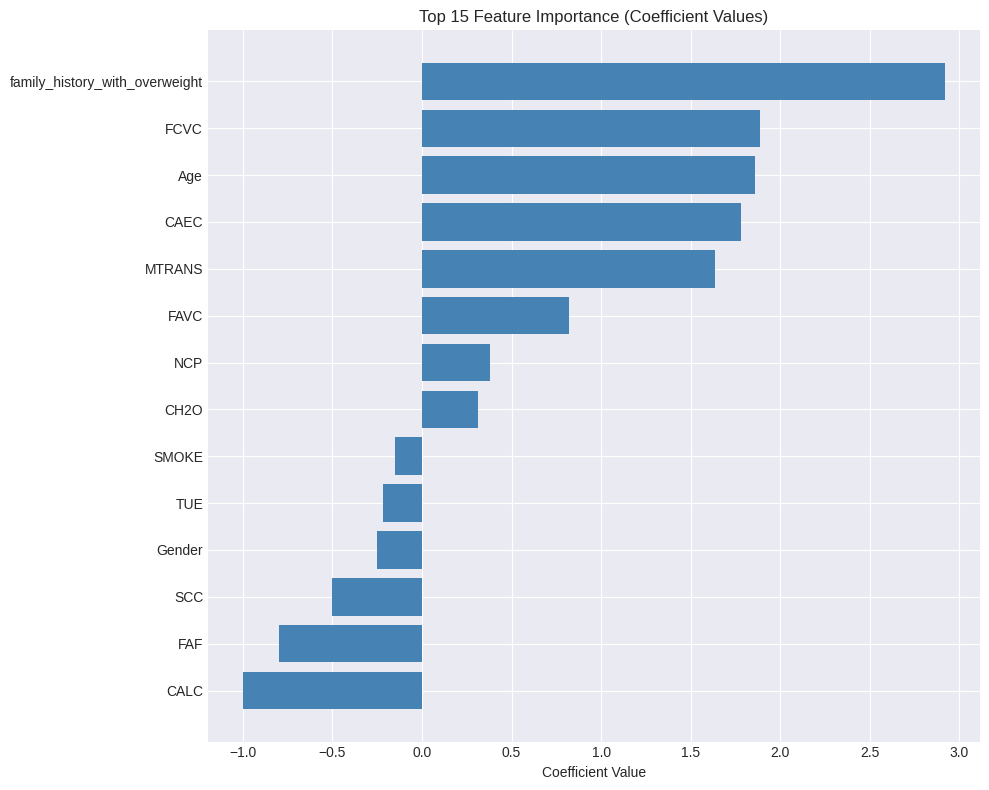

In [ ]:
# 11.3 Feature Importance (Coefficients)
plt.figure(figsize=(10, 8))
coef_df_plot = coef_df.sort_values('Coefficient', ascending=True).tail(15)
plt.barh(coef_df_plot['Feature'], coef_df_plot['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Importance (Coefficient Values)')
plt.tight_layout()
plt.savefig('06_feature_importance.png', dpi=300, bbox_inches='tight')
print("✅ Feature importance plot disimpan: 06_feature_importance.png")
plt.show()

✅ Residuals distribution plot disimpan: 07_residuals_distribution.png


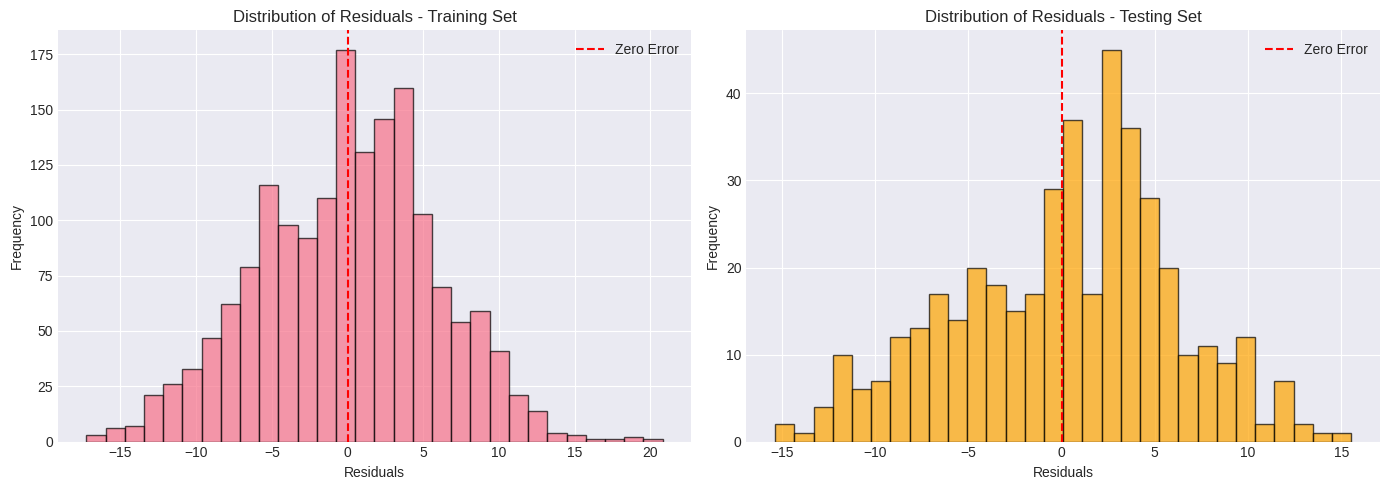

In [ ]:
# 11.4 Distribution of Residuals
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(residuals_train, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Residuals - Training Set')
axes[0].axvline(0, color='red', linestyle='--', label='Zero Error')
axes[0].legend()

axes[1].hist(residuals_test, bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Residuals - Testing Set')
axes[1].axvline(0, color='red', linestyle='--', label='Zero Error')
axes[1].legend()

plt.tight_layout()
plt.savefig('07_residuals_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Residuals distribution plot disimpan: 07_residuals_distribution.png")
plt.show()

# KESIMPULAN & REKOMENDASI

KESIMPULAN:

1. Dataset & Preprocessing:
   - Total data: {len(df)} records
   - Features: {len(feature_cols)} variabel prediktor
   - Target: BMI (Body Mass Index)
   - Tidak ada missing values
   
2. Model Performance:
   - Model Linear Regression berhasil di-train
   - R² Score Testing: {test_r2:.4f} ({test_r2*100:.2f}%)
   - RMSE: {test_rmse:.4f}
   - MAE: {test_mae:.4f}
   
3. Top 3 Features dengan Pengaruh Terbesar:
   {coef_df.head(3).to_string(index=False)}

4. Interpretasi Model:
   - Model {"dapat" if test_r2 > 0.7 else "cukup dapat" if test_r2 > 0.5 else "kurang dapat"} menjelaskan variasi BMI dengan baik
   - Error prediksi rata-rata: ±{test_mae:.2f} poin BMI
   - Model {"tidak menunjukkan" if abs(train_r2 - test_r2) < 0.1 else "menunjukkan tanda-tanda"} overfitting
